# Convolutions and Dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

### Convlutions


#### Apply to arrays (20 points)
Apply the convolutions from Ex2 to the following array, using numpy:


In [ ]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

the convolutions from Ex2:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

In [ ]:
# after applying k1 to x
x_k1 = np.array([[ -2, -4,  0],
       [-2,  2,  2],
       [-3, -4, -4]])

# after applying k2 to x
x_k2 = np.array([[  -4,  0, -2],
       [2,  2,  3],
       [ -4, -4, -2]])


# after applying k3 to x
x_k3 = np.array([[-3, -25, 4],
       [ -4, 33, 27],
       [-13, -27, -36]])

# after applying k4 to x
x_k4 = np.array([   [-1.67, -1.22, -0.44],
       [-1.56, -1.67, -1],
       [-1.56, -1, 0]])

#### Apply to images (20 points)
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image.
Show the results:

/var/folders/p8/b11rskbj1zdf4sn__0fjfwdm0000gn/T/ipykernel_1990/1283639952.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = scipy.misc.face()


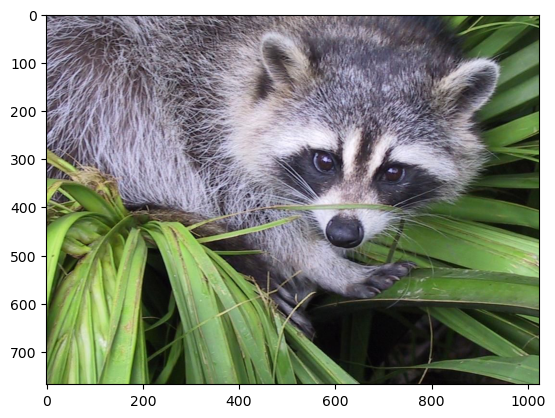

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()

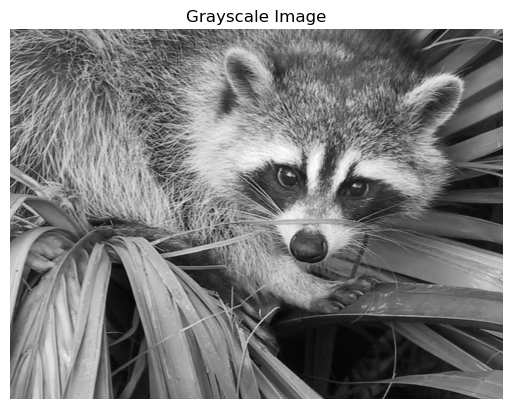

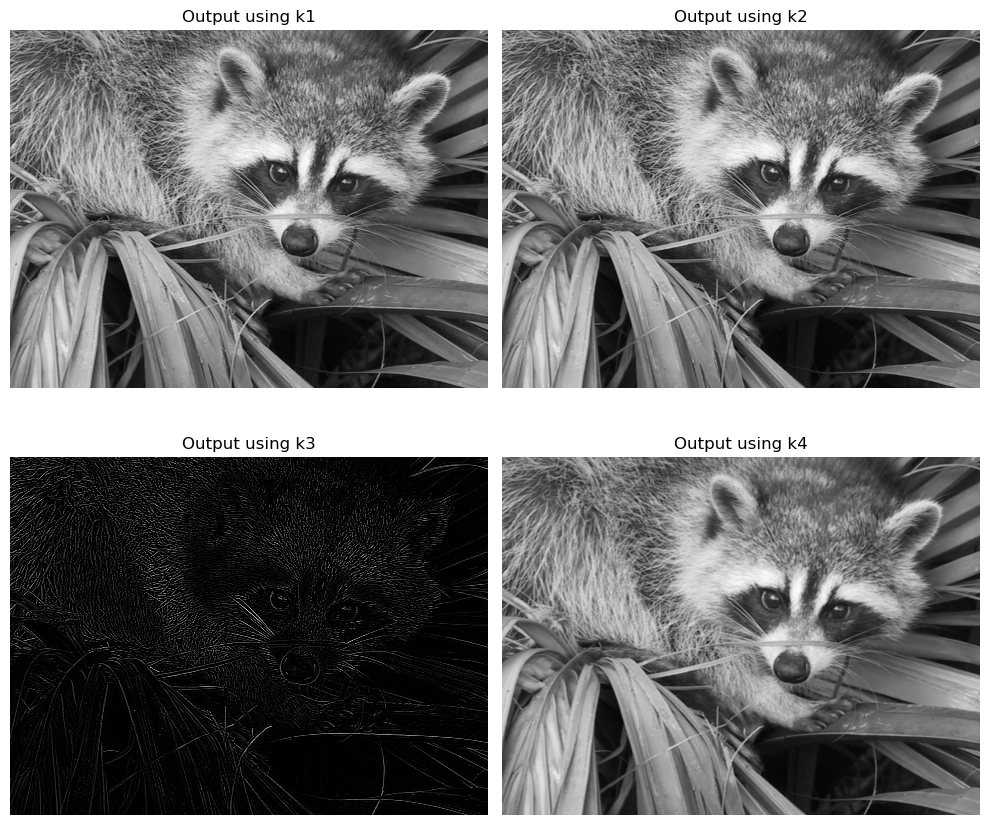

In [85]:
# Write your answer here

# convert an RGB image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

# convolution function
def convolution(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    
    # Define the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize the output image
    output = np.zeros((output_height, output_width))
    
    # Perform the convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = (image[i:i+kernel_height, j:j+kernel_width] * kernel).sum()
            
    return output

# convert the image to grayscale
gray_face = rgb2gray(face)

# show the grayscale image
plt.imshow(gray_face, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# define the convolution filters
k1 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
k2 = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])
k3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
k4 = np.ones((3, 3)) / 9

# apply the convolution filters
i = 1
plt.figure(figsize=(10, 9))
for k in [k1, k2, k3, k4]:
    plt.subplot(2, 2, i)
    plt.imshow(convolution(gray_face, k), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Output using k{i}')
    plt.axis('off')
    i+= 1

plt.tight_layout()
plt.show()


## Dimensions (20 points)

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride.

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

The equation for the dimension:
$$\text{Output dimension} = \frac{N + 2P - F}{S} + 1$$

Where: <br>
N - input size (for square)<br>
P - padding<br>
F - size of a filter (for square)<br>
S - stride<br>

1. No padding, stride of 1 <br>
consider the filter 3X3:<br><br>
$((N + 2 * 0 - 3) / 1) + 1 = N - 2$ <br><br>
The ouput would be (N - 2) X (N - 2)

1. No padding, stride of 2 <br>
consider the filter 5X5:<br><br>
$((N + 2 * 0 - 5) / 2) + 1 = (N - 3)/2$ <br><br>
The ouput would be (N - 3)/2 X (N - 3)/2

1. Zero padding, stride of 1 <br>
consider the filter 3X3:<br><br>
$((N + 2 * 1 - 3) / 1) + 1 = N$ <br><br>
The ouput would be N X N

1. Zero padding, stride of 2
consider the filter 7X7:<br><br>
$((N + 2 * 1 - 7) / 2) + 1 = (N - 3)/2$ <br><br>
The ouput would be (N - 3)/2 X (N - 3)/2

### Network dimensions (40 points)
Below is a network architecture suggestion for classificy MNIST data.
Write: \\
(1) the output dimensions of evrry layer in the format (C,W,H) -> (#channels, width, height) \\
(2) the number of parameters at every layer \\
(3) number of calculations made in each layer

- Convolutional Layer #1: Applies 32 5x5 filters, with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


In [83]:
# Write your answer here

def network_dimesions(insize, tlayer, fsize=None, fnum=None, stride=1, padding=0, nneurons=None, dropout=0, bias=0):
    if tlayer == 'conv':
        od = int((insize[1] + 2*padding - fsize)/stride + 1)
        odl = [fnum, od, od]
        print(f'Output dimensions: ({odl[0]} x {odl[1]} x {odl[2]})')
        # with bias
        npar = (fsize ** 2 * insize[2] + bias) * fnum
        print('Number of parameters:', npar)
        # FLOPs = 2 x Number of Kernel x Kernel Shape x Output Shape
        print('Number of calculations:', int(2 * fnum * (fsize ** 2 * insize[0]) * od ** 2))

    if tlayer == 'pool':
        od = int((insize[1] + 2*padding - fsize)/stride + 1)
        odl = [insize[0], od, od]
        print(f'Output dimensions: ({odl[0]} x {odl[1]} x {odl[2]})')
        print('Number of parameters: 0')
        # FLOPs = Height x Depth x Width of an image
        print('Number of calculations:', int(odl[0] * odl[1] * odl[2]))

    if tlayer == 'dense':
        print(f'Output dimensions: {nneurons} neurons')
        prsize = (insize[0] * insize[1] * insize[2]) if len(insize)>1 else insize[0]
        print('Number of parameters:', prsize * nneurons + nneurons)
        # FLOPs = 2x Input Size x Output Size
        print('Number of calculations:',  int((nneurons * (2 *  prsize+ 1)) * (1 - dropout)))
        odl = [nneurons]

    return odl

In [84]:
print("Convolutional Layer #1:")
nsize = network_dimesions([1,28,28], 'conv', fsize=5, fnum=32)
print()

print("Pooling Layer #1")
nsize = network_dimesions(nsize, 'pool', fsize=2, stride=2)
print()

print("Convolutional Layer #2:")
nsize = network_dimesions(nsize, 'conv', fsize=5, fnum=64)
print()

print("Pooling Layer #2")
nsize = network_dimesions(nsize, 'pool', fsize=2, stride=2)
print()

print("Dense Layer #1")
nsize = network_dimesions(nsize, 'dense', nneurons=1024, dropout=0.4)
print()

print("Dense Layer #2")
nsize = network_dimesions(nsize, 'dense', nneurons=10)
print()

Convolutional Layer #1:
Output dimensions: (32 x 24 x 24)
Number of parameters: 22400
Number of calculations: 921600

Pooling Layer #1
Output dimensions: (32 x 12 x 12)
Number of parameters: 0
Number of calculations: 4608

Convolutional Layer #2:
Output dimensions: (64 x 8 x 8)
Number of parameters: 19200
Number of calculations: 6553600

Pooling Layer #2
Output dimensions: (64 x 4 x 4)
Number of parameters: 0
Number of calculations: 1024

Dense Layer #1
Output dimensions: 1024 neurons
Number of parameters: 1049600
Number of calculations: 1258905

Dense Layer #2
Output dimensions: 10 neurons
Number of parameters: 10250
Number of calculations: 20490

